In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [30]:
with open("/Users/weilu/openmmawsem/pdb_seqres.txt" ) as f:
    data = f.readlines()

In [26]:
data = data[:10]

In [31]:
n = len(data)//2
need = open("/Users/weilu/Research/optimization/fragment/need_pdb_seqres.txt", "w")
noNeed = open("/Users/weilu/Research/optimization/fragment/noNeed_pdb_seqres.txt", "w")
    
for index in range(n):
    i = index * 2
    name_line = data[i]
    seq_line = data[i+1]
    a = name_line.strip().split(" ")
    pdb = a[0]
    seq_type = a[1]
    if seq_type == "mol:protein":
        need.write(name_line)
        need.write(seq_line)
    else:
        noNeed.write(name_line)
        noNeed.write(seq_line)
#     print(a)
need.close()
noNeed.close()

In [32]:
# wget https://blanco.biomol.uci.edu/mpstruc/listAll/pdbIdList
with open("/Users/weilu/Research/optimization/fragment/pdbIdList") as f:
    d = f.readlines()

In [35]:
membrane_protein_list = eval(d[0])

In [37]:
len(membrane_protein_list)

2783

In [39]:
# Only use membrane protein.
with open("/Users/weilu/Research/optimization/fragment/need_pdb_seqres.txt" ) as f:
    data = f.readlines()

In [43]:
n = len(data)//2
membrane_only = open("/Users/weilu/Research/optimization/fragment/membrane_only_pdb_seqres.txt", "w")

for index in range(n):
    i = index * 2
    name_line = data[i]
    seq_line = data[i+1]
    a = name_line.strip().split(" ")
    pdb = a[0]
    seq_type = a[1]
    pdb_4 = pdb[1:5].upper()
    if pdb_4 in membrane_protein_list:
        membrane_only.write(name_line)
        membrane_only.write(seq_line)

In [46]:
pdb_list_for_cull = open("/Users/weilu/Research/optimization/fragment/pdb_list_for_cull", "w")
# membrane_protein_list
for pdb in membrane_protein_list:
    pdb_list_for_cull.write(pdb+"\n")
pdb_list_for_cull.close()

In [5]:
len(data)

802430

In [7]:
name_data = data[::2]

In [11]:
name_data_a = [i.strip().split(" ") for i in name_data]

In [13]:
d = pd.DataFrame(name_data_a)

In [16]:
d.columns =

RangeIndex(start=0, stop=58, step=1)

In [21]:
d

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,>101m_A,mol:protein,length:154,,MYOGLOBIN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,>102l_A,mol:protein,length:165,,T4,LYSOZYME,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,>102m_A,mol:protein,length:154,,MYOGLOBIN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,>103l_A,mol:protein,length:167,,T4,LYSOZYME,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,>103m_A,mol:protein,length:154,,MYOGLOBIN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,>104l_A,mol:protein,length:166,,T4,LYSOZYME,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,>104l_B,mol:protein,length:166,,T4,LYSOZYME,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,>104m_A,mol:protein,length:153,,MYOGLOBIN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,>105m_A,mol:protein,length:153,,MYOGLOBIN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,>106m_A,mol:protein,length:154,,MYOGLOBIN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
d.iloc[:,1].unique()

array(['mol:protein', 'mol:na'], dtype=object)

In [24]:
for i in d.iloc[:,4].unique():
    print(i)

MYOGLOBIN
T4
GLUTATHIONE
PROTEIN
ASPARAGINE
H-RAS
CARBONIC
IGG1-KAPPA
HEN
HUMAN
TURKEY
3-PHOSPHOGLYCERATE
GOOSE
CYTOCHROME
IGG
LYSOZYME
SIGNAL
HEMOGLOBIN
NUCLEAR
AP-1
CALCYCLIN
NITRATE/NITRITE
3-ISOPROPYLMALATE
CALCIUM/CALMODULIN-DEPENDENT
C-SRC
AEROBIC
XYLOSE
D-AMINO
MEIZOTHROMBIN
DNA
TRYPSIN
PROFILIN
BETA-TRYPTASE
FYN
CHEY
CHEA
SITE-SPECIFIC
29G11
TRANSDUCIN
PHOSDUCIN
SUCROSE-SPECIFIC
ACETYLCHOLINE
REGULATOR
NEURAMINIDASE
NC10
STROMAL
AMINOPEPTIDASE
SERINE/THREONINE
ADIPOCYTE
BARSTAR
RNA
THREE-FINGER
DSNR
QGSR
RADR
HLA
Beta-2-microglobulin
NS3
NS4A
ORNITHINE
NUCLEOCAPSID
P53
FADD
HMTCP-1
TISSUE
GROWTH
DSBA
POLY
17-BETA-HYDROXYSTEROID-DEHYDROGENASE
PROGESTERONE
CALMODULIN
PHOSPHOLIPASE
TRANSFORMING
Thrombin
DISULFIDE
RAN
UDP-N-ACETYLGLUCOSAMINE
CHEB
BARNASE
SUBTILISIN
STAPHYLOCOCCAL
METHYLAMINE
RIBONUCLEASE
TROPONIN
PYRROLIDONE
HIV-1
RIBOSOMAL
PEPTIDYLPROLYL
TOPOISOMERASE
14-3-3
R18
ENDOGLUCANASE
MANNITOL-SPECIFIC
ALPHA-THROMBIN
PYRIMIDINE
BRANCHED-CHAIN
GALECTIN-3
IMMUNOGLOBULIN
EPID

YchF
Ubiquitin-Conjugating
Coenzyme
HPRK
Agrin
telomere-binding
ferredoxin-NADP
ubiquitin
Chemotaxis
transcription
cochlin
CD3
CLPB
C-Phycocyanin
Restrictocin
restrictocin
Methylmalonyl-CoA
VENOM
techylectin-5A
ROD
DEOXYRIBOSE-PHOSPHATE
INDOLE-3-GLYCEROL-PHOSPHATE
Insulin
Glucarate
CU/ZN
chorismate
1,4-ALPHA
PYRUVATE,
hTcf-4
L-RIBULOSE
Sarcolipin
C-TYPE
5'-METHYLTHIOADENOSINE
L-ARGININE:GLYCINE
PHOSPHOGLUCOMUTASE
macrophage
HELIX-DESTABILIZING
Nitrate/Nitrite
EMERIN
ENV
CHALCONE--FLAVONONE
KU70
KU80
Ku70
Ku80
Obelin
obelin
monomer
arsenate
SELENOCYSTEINE
TRICHODIENE
nitric-oxide
tubulin
TATA-BOX-BINDING
retinoic
rhodopsin
ANTIGEN-BINDING
TAT
1,4-beta-N-Acetylmuramidase
thymidylate
protein-L-isoaspartate
L-allo-threonine
Amylosucrase
bacterioferritin
Segmentation
amylosucrase
CANDOXIN
Phosphotriesterase
polyadenylate-binding
BETA-LACTAM
Antibody
Photosynthetic
Matrix
cyclic
Nicotinate
LEXA
APC10
calnexin
MOG1
ABC
NEUTROPHIL-ACTIVATING
Dlp-1
ETS-RELATED
dissimilatory
METALLOTHIONEIN-III


Hfq
(3R)-hydroxymyristoyl-[acyl
U8
myo-inositol
Cytohesin
Dystroglycan
2-hydroxy-6-ketonona-2,4-dienedioic
Aortic
Histone-like
low
Actin-Related
Cadmium
ADP-specific
Histone-lysine
Corticotropin
Hist1h4i
H2A
Thiol:
Cryptochrome
HNH
Mouse
prion-like
Huntingtin-associated
Activated
Inward
MHC-I
2-oxoisovalerate
Src-associated
citE
Cytoplasmic
appears
Defective
Allene
F105
kelch-like
RING-box
TIP120
acetyltransferase,
Creatine
Exopolyphosphatase
hypotensive
transposable
SRQGSTQGRLDDFFKVTGSL
magnesium-dependent
Phosphosulfolactate
Ada
Iron-dependent
Gamma-aminobutyrate
Maltose-6'-phosphate
APC35852
pArc
cruzipain
Ribose-phosphate
Exocyst
UDP-N-ACETYLMURAMOYL-L-ALANINE/:D-GLUTAMATE
polyguluronate
Procollagen
cytosine
Rhodanese
mouse-musashi-1
archaerhodopsin-1
Phosphomethylpyrimidine
attachment
Catalase-peroxidase
MazF
MazE
diol
Ciliary
lysine
nucleoside
Apoptosis-associated
phase
Glycinin
70
UDP-GALACTOSE-4-EPIMERASE
Nawaprin
Uridine-cytidine
367aa
4-(cytidine
KIAA1568
KIAA0343
Penaeidin-3

penultimate
Arylamine
Molybdenum-binding
milk
Prophenoloxidase
Rab12
Epsilon-class
Fanconi
Poliovirus
2-hydroxychromene-2-carboxylate
Toluene,
TouB
DES-PHE
Dihydroflavonol
Pertactin
PapB
(3(17)alpha-hydroxysteroid
3(17)alpha-hydroxysteroid
Aclacinomycin
IgG2a
endopolygalacturonase
Iron,
Fumarase
DNA-(apurinic
BluB
NYSGXRC-8828z,
362aa
TRNA-(Ms(2)io(6)a)-hydroxylase,
Iron-regulated
Xylulose
UDP-3-O-[3-HYDROXYMYRISTOYL]
DIVALENT
PACTOLUS
LIPOXYGENASE
ALKYLATED
LIPOPOLYSACCHARIDE
BETA-ARRESTIN-1
PROTOPORPHYRINOGEN
ETHYLBENZENE
COLCIN-E7
O-SIALOGLYCOPROTEIN
UP1
PILP
CYCLIN-T2
MANGANESE-DEPENDENT
LYSINE-SPECIFIC
REST
CYCLIN-A2
52
GAG-POL
PHOSPHATIDYLINOSITOL-4-PHOSPHATE
ALPHA-AMYLASE/SUBTILISIN
EXORIBONUCLEASE
MYOSIN-5A
ALPHA-N-ACETYLGALACTOSAMINIDASE
LMBE-RELATED
SDAI
36KDA
THIOL
LPHA-2,3/2,6-SIALYLTRANSFERASE/SIALIDASE
SUBA
OLEANDOMYCIN
TESTIN
APPA,
BETA-MICROSEMINOPROTEIN
MOCO
RYEGRASS
PYRROLINE-5-CARBOXYLATE
YDR362CP
DEOXYRIBODIPYRIMIDINE
BETA-1,3-N-ACETYLGLUCOSAMINYLTRANSFERASE
6-PHOSP

FeFe-Hydrogenase
OsmC-like
Invasion
YRAM
2-hydroxymethyl
Hemagglutinin-esterase
Puue
DHFR-TS
SsgA-like
fms1
Mlotik1
Delta(5)-3-ketosteroid
Aminopeptidase,
Thiol-activated
L-ribulose-5-phosphate
Endochitinase
Violaxanthin
FBP32
RAC-alpha
Anhydro-N-acetylmuramic
PTS-dependent
Adenylyl-sulfate
RAIDD
XPD/Rad3
Sugar-binding
Morphogenesis
D-allulose-6-phosphate
Pregnane
Maltase-glucoamylase
RcdA
Ribulose-5-phosphate
Transport
Exo-beta-1,4-glucanase
25-D1.16
Methyltransferase-like
RE11660p
Thiamine-biosynthesis
beta/alpha-barrel
ParA
Rab6-interacting
N-chimerin
Dehydrogenase
RmpB
Ephrin-A1
Hyb3k
YflH
Ephrin-B3
RNA-induced
Sonic
berberine
UL18
Expansin
Sulfate/molybdate
Spondin-2
YvgN
L-2,4-diaminobutyric
Actibind
FomA
Sphericase
Sts-2
Concanavalin-A
Glutaredoxin-2,
Formylglycinamide
Platelet-activating
Haementhin
Q97W15_SULSO
Polo-like
Allergen
Methyl-accepting/DNA
(3R)-hydroxymyristoyl-[acyl-carrier-protein]
Multidrug-efflux
BMR
Benzaldehyde
Lin1944
Flavodoxin,
Interleukin-23
Interleukin-12


PREDICTED
EFEM
MUREIN
APC/C
APC/C-CDH1
ANTI-ARS
FLORICAULA/LEAFY
MOSUB1
PILIN,
NADP-SPECIFIC
PATERNALLY-EXPRESSED
SSP1
SSSP1
CUPIN
INTERMEDILYSIN
CEREBRAL
GFOGER
AMPDH2
RAP1-INTERACTING
ZEBAVIDIN
DIHYDROOROTASE
AVRM
AVRM-A
N-ACETYLGLUCOSAMINE-PHOSPHATE
DESULFOFERRODOXIN,
2-DEHYDRO-3-DEOXYPHOSPHOGLUCONATE
EPHRIN-B3
M2139
J1
METASTASIS-ASSOCIATED
METHIONINE--TRNA
LATENCY-ASSOCIATED
PACKAGING
P4
SIMILAR
GALECTIN-8
S-M
ALCLOHOL
ALPHA-PHOSPHOGLUCOMUTASE
NON-CANONICAL
HEPATOPANCREAS
ERPP
JAPANIN
ALPHA-1,6-MANNANASE
ENDO-1,3-BETA-GLUCANASE,
UBIQUITIN-C
OLIGOPEPTIDASSE
D-ALANINE--POLY(PHOSPHORIBITOL)
NUCLEOPLASMIN
CITRATE:SODIUM
FKBO
SCO
B-AGARASE
NEOGENIN
RGM
ALPHA-GLUCAN
T-DNA
ACTIN/ACTIN
GLUTAMINASE
CAPSULAR
MULTICILIN
KEMP
TRUD
EXPORTIN-1
R-SPONDIN-1
HETERODIMERIC
ALPHA-ACETOLACTATE
MIXED
TAU-TUBULIN
UDP-N-ACETYLMURAMOYL-L-ALANYL-D-GLUTAMATE--LD-LYSINE
CLONE
SUPERKILLER
NEQ011
APOPTOSIS-INDUCING
THIOMORPHOLINE-CARBOXYLATE
CYANURIC
PYRROLYSINE--TRNA
SUBTILASE
NCHI2,
PAB-DEPENDENT
POLYGLUTAM

ACPC-13
4-oxalmesaconate
FRIGIDA
Mono-
nvPizza2-S16H58
AraC
Ubl
Xrcc4-MYH7-1590-1657
pyrroloquinoline
Sibling
Xrcc4-MYH7-(1631-1692)
Gp7-MYH7-(1526-1571)
Xrcc4-MYH7-(1562-1622)
Osteoclast-associated
SRX
LegK4
Sporulation-control
AlkD
OsmC
Epsin-5
IcmL-like
Nuclease-like
FrnE
Protocadherin-19
Iridoid
SDAP
IRC4
Sleeping
SdeA
GANTENERUMAB
Quadruple
Bidirectional
DMSP
Sestrin-2
Ruler
SrtE1
SloR
FNR
BRCA1/BRCA2-containing
DrBRCC36
sAB-158
FYVE
ferulic
Ts3
T33-51H-B
T33-51H-A
M64R
Acyl-carrier-protein
PaaA2
Myroilysin
20358
Legionella
N-acetyl-alpha-D-glucosaminyl
Epoxyqueuosine
D2-06
P5
Rv1816
Rv3249c
D4-30
Y10
D4-10
LecA
Fibroin-modulator-binding
GM-CSF/IL-2
MlnE
C7
C25
S-component
Dynamin-1,Dynamin-1
Centrin-1
Anti-repressor
HdaB,HdaA
Tuber
M33.64
HcgB
4497
CsuC
CsuA/B
SPHERULIN-4
Berberine
MAV36
Pr160
MerR
Metagenomic
Ferroxidase
AF2299
TIP41-like
STE20/SPS1-related
Sulphate
Rru_A0973
Thermococcales
AAEL006007-PA
NalD
NAP1-related
Scabin
AS25
PhoB
Foot
CrmG
Deferrochelatase
Biflaviolin
A

GLU-ILE-TIH-THC-NVA
2-thiophenyl
ACE-GLN-ALC-ASP-LEU-ZCL
Sunflower
peptide1
peptide2
ALA-CYS-PRO-PRO-CYS-LEU-TRP-GLN-VAL-LEU-CYS-GLY
CYS-THR-THR-LYS-ILE-LYS-PRO
ADEP-2B5Me
Quinupristin
Linopristin
SAH-MPER(662-683KKK)(B,q)
ALQDA
FLNKD
PHOSPHOSPROTEIN
YS-02
YS-01
M06
AZOBENZENE-CONTAINING
SUCCINYL-CPS1-PEPTIDE
GLUTARYL-CPS1
CARBAMOYLPHOSPHATE
C-TERM
viomycin
Viomycin
capreomycin
VIOMYCIN
Dityromycin
GE82832
APY-bAla8.am
APY
PrP
Prp
hexa-His
ORN-TYR-LEU-LEU-PHI-TYR-THR-GLU-ORN-LYS-VAL-ALA-MAA-ALA-VAL-LYS
ORN-TYR-LEU-LEU-PHI-TYR-THR-GLU-ORN-LYS-VAL-ALA-MLE-ALA-VAL-LYS
C6H5(CH2)8-DERIVATIZED
KRIT1
Daxx
ARG-GLY-ASP
GLY-ARG-GLY-ASP-SER-PRO
ALA-CYS-ARG-GLY-ASP-GLY-TRP-CYS
ALA-FGA-API-DAL-DAL
RHKILHRLLQEGSPS
ICP0
VAL-GLU-ARG-LEU-GLN-ILE-PHE-GLN-HIS-LEU-HIS-PRO-ILE
Chibby
Cenp-C
8-Mer
ARG-MET-PHE-PRO-ASN-ALA-PRO-TYR-LEU
BTN-3V3-NLB-OMT-OIC-3V2
3,11-DIFLUORO-6,8,13-TRIMETHYL-8H-QUINO[4,3,2-KL]ACRIDIN-13-IUM
ISOFORM
Poly(UNK)
ALA-ALA-ALA-LYS-ALA
ALA-ALA-LYS
ORN-TYR-LEU-LEU-PHI-TYR-VAL-GLU-ORN-LYS

tRNA-Phe
5'-R(P*AP*UP*G)-3'
A-tRNA
5'-R(*CP*(MA6))-3'
5'-R(*AP*UP*UP*GP*UP*AP*AP*AP*AP*A)-3'
tRNA-Leu
21S
TSV
P/E-site
A/P
P/E
Messenger
mt-tRNAVal
Met-tRNAi
12S
tRNA-Asp
P/E-tRNA
tRNA(Lys)
Val
glycine-tRNA
Nicked
5'-D(P*GP*AP*TP*CP*TP*GP*GP*CP*CP*TP*GP*TP*CP*TP*TP*A)-3'
12-RSS
5'-D(*CP*AP*CP*AP*GP*TP*GP*CP*TP*AP*CP*AP*GP*AP*C)-3'
5'-D(P*GP*TP*CP*TP*GP*TP*AP*GP*CP*AP*CP*TP*GP*TP*G)-3'
5'-D(*GP*CP*GP*AP*TP*GP*GP*TP*TP*AP*AP*CP*CP*A)-3'
5'-D(P*TP*GP*GP*TP*TP*AP*AP*CP*CP*AP*TP*CP*GP*C)-3'
5'-D(P*CP*AP*CP*AP*GP*TP*GP*CP*TP*AP*CP*AP*GP*AP*C)-3'
RSS
'-D(P*GP*AP*TP*CP*TP*GP*GP*CP*CP*TP*GP*TP*CP*TP*TP*A)-3'
5'-D(*AP*AP*TP*GP*CP*CP*GP*CP*AP*GP*TP*CP*GP*GP*CP*CP*GP*AP*CP*CP*TP*G)-3'
5'-D(*CP*AP*GP*GP*TP*CP*GP*GP*CP*CP*GP*AP*CP*TP*GP*CP*GP*GP*CP*A)-3'
23
pre-mRNA
SNR6
SNR14
SNR7-L
U4
RDN25-1
RDN58-1
RDN5-2
ITS2-1
5'-D(*CP*AP*TP*TP*TP*AP*AP*GP*AP*CP*GP*TP*CP*TP*TP*AP*AP*AP*TP*A)-3'
5'-D(*TP*AP*TP*TP*TP*AP*AP*GP*AP*CP*GP*TP*CP*TP*TP*AP*AP*AP*TP*G)-3'
5'-D(*CP*AP*TP*TP*TP*AP*AP*GP*AP*TP*AP*TP*CP*TP*

In [17]:
a = glob.glob("/Users/weilu/Research/server/jun_2019/openMM_membrane_structure_prediction/outs/*.out")

In [18]:
len(a)

1872

In [81]:
data = []
for outFile in a:
    remove = False
    name = ""
    time = -1
    with open(outFile) as f:
        for line in f:
            if "mm_run.py setup" in line:
                name = line.split(" ")[3]
#                 print(name)
#                 print(line.strip())
#                 print('---')
            if "hours" in line:
#                 print(line)
                tmp = line.strip()[3:-3].split(" ")
                time = float(tmp[0])*60 + float(tmp[2]) + float(tmp[4])/60.0
#                 print(time)
                break    # first time
            if "CANCELLED" in line:
                if "TIME LIMIT" in line:
                    pass
#                     print(line)
#                     print(outFile)
                else:
                    print("delete")
                    print(outFile)
                    remove = True
    data.append([outFile.split("/")[-1], name, time])
    if remove:
        try:
            os.remove(outFile)
        except OSError:
            print("already gone")
            pass

In [82]:
df = pd.DataFrame(data, columns=["file", "name", "time"])

In [83]:
df[["folder", "protein", "run"]] = df['name'].apply(lambda x: pd.Series(x.split('/')))

In [84]:
df[["repeat", "run"]] = df["run"].apply(lambda x: pd.Series(x.split('_')))

In [88]:
original = df.query("folder == 'original' and repeat != 'native' and time != -1")

In [95]:
t = df.query("repeat != 'native' and time != -1")

In [ ]:
stripplot

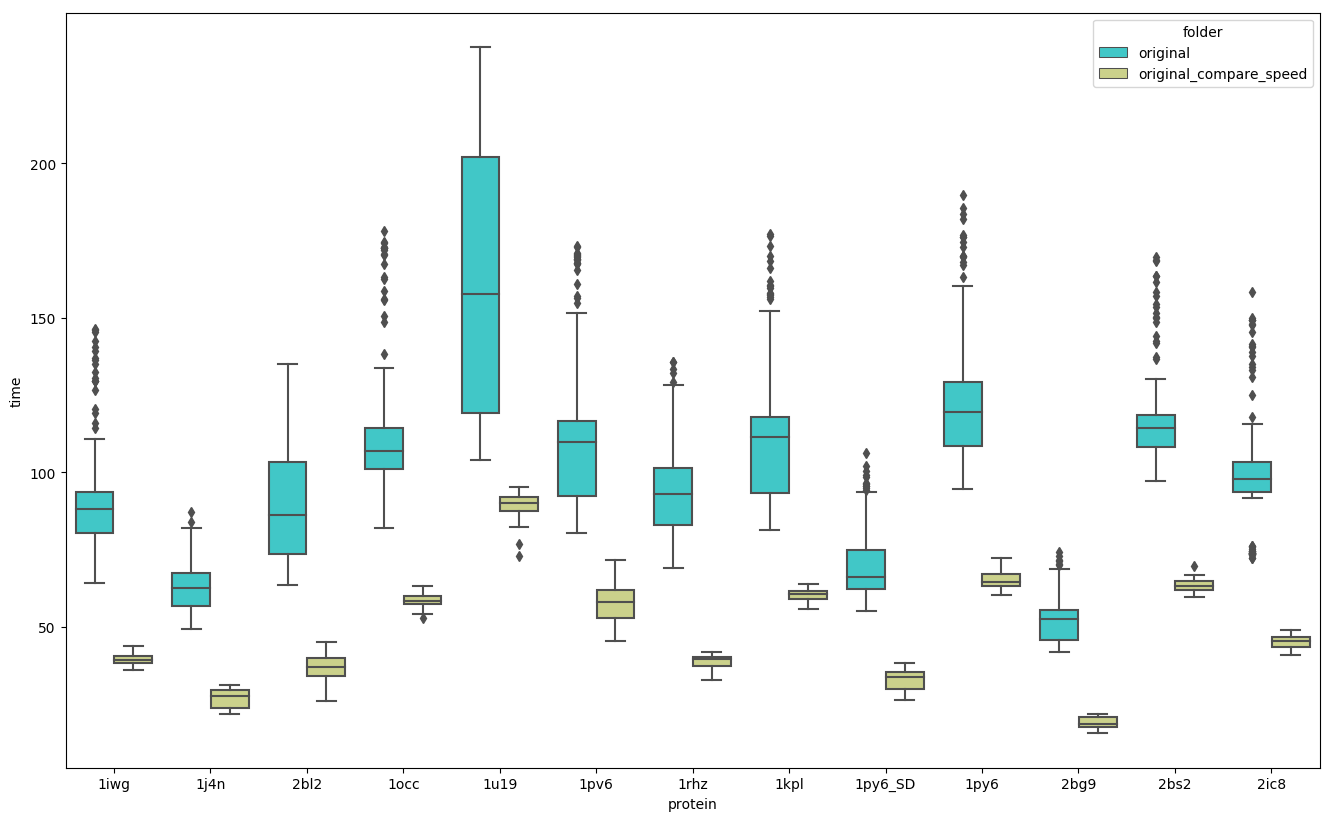

In [100]:
sns.boxplot(x="protein", y="time", data=t, hue="folder", palette='rainbow')

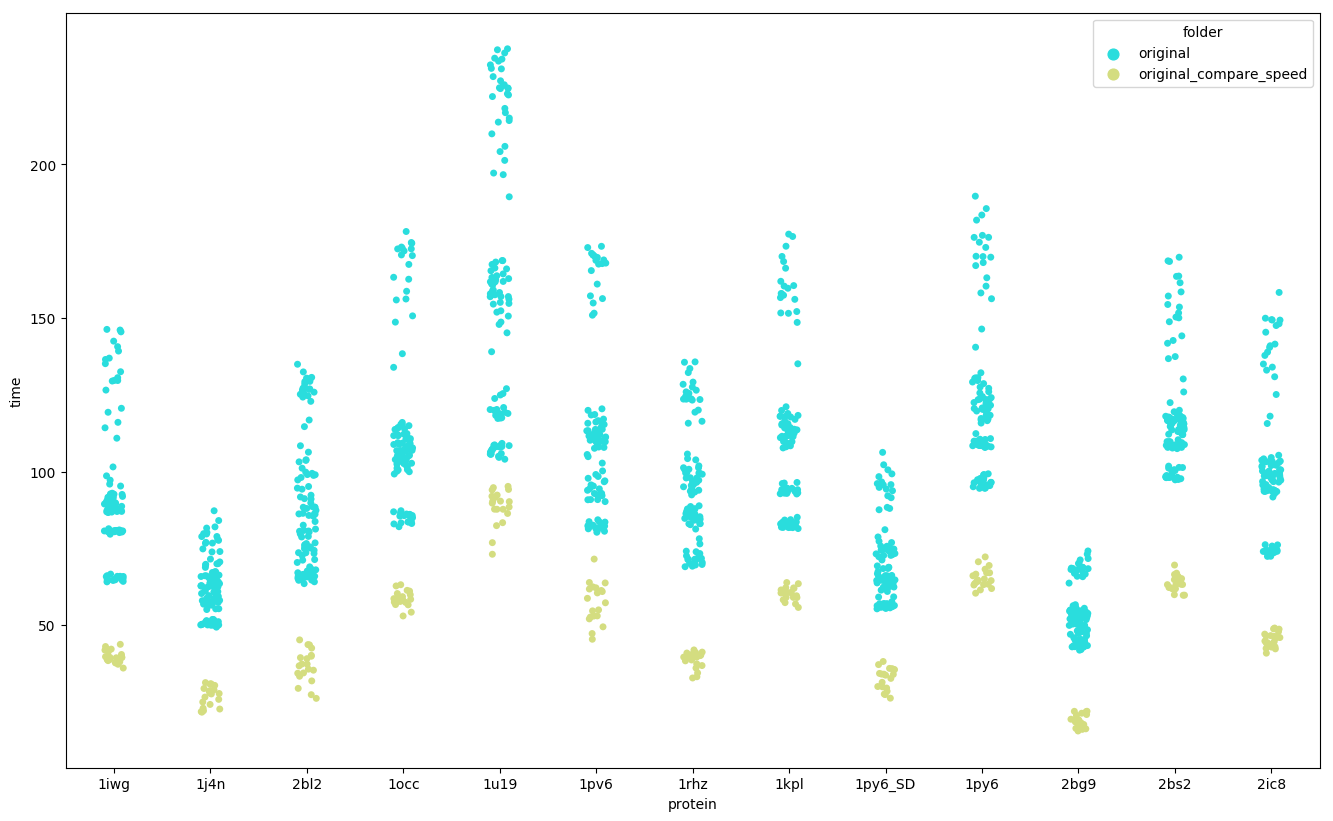

In [99]:
sns.stripplot(x="protein", y="time", data=t, hue="folder", palette='rainbow')

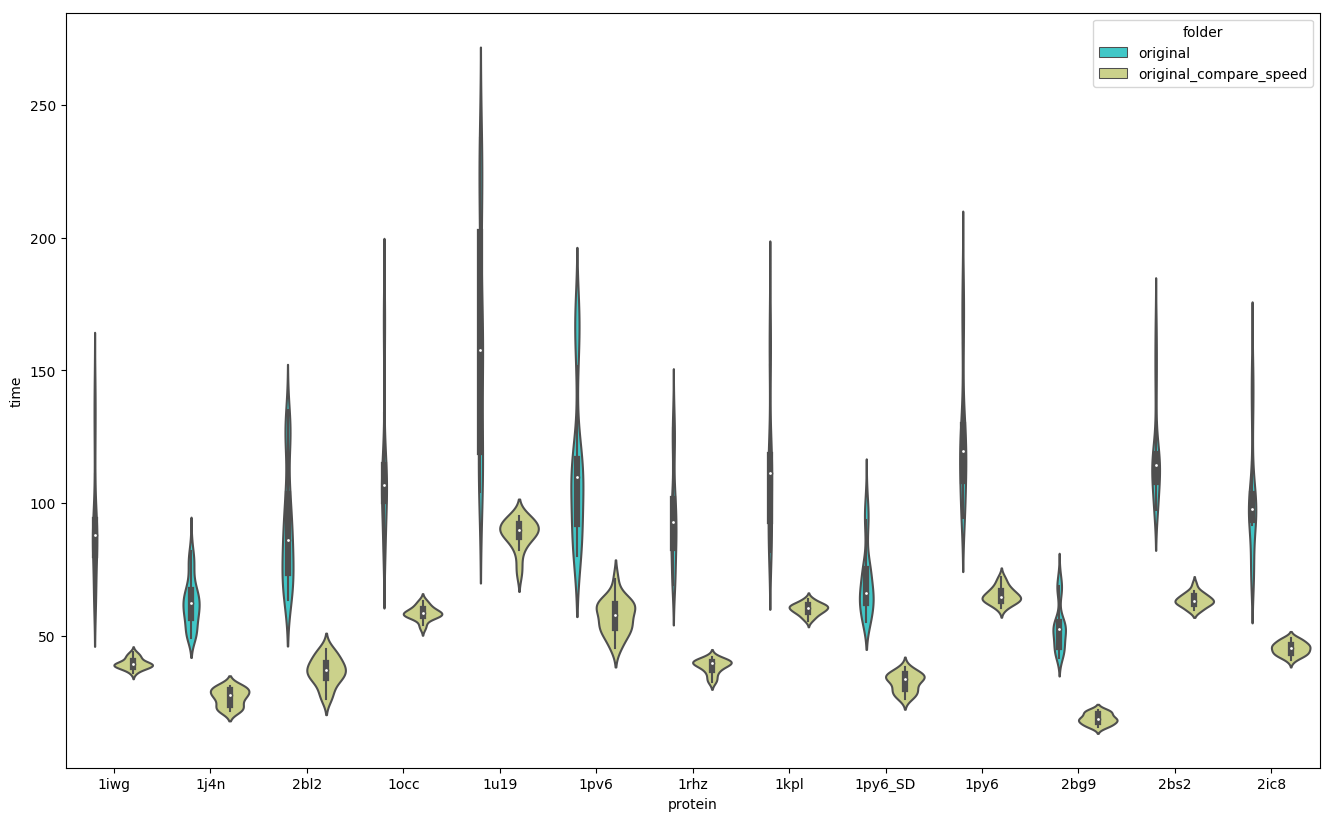

In [98]:
sns.violinplot(x="protein", y="time", data=t, hue="folder", palette='rainbow')

In [89]:
t = original

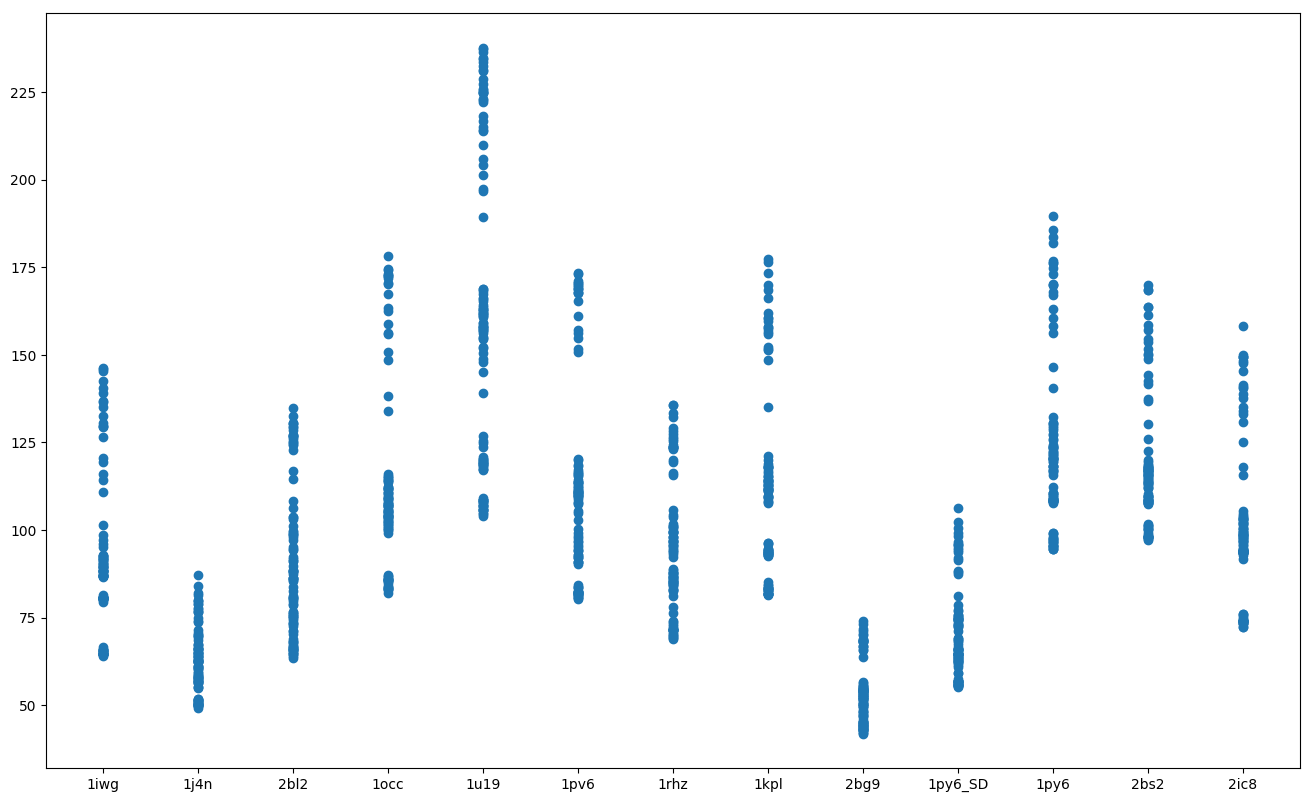

In [93]:
plt.scatter(original["protein"], original["time"])

In [90]:
t.sort_values("name")

,file,name,time,folder,protein,run,repeat
223,slurm-9065798.out,original/1iwg/0_0,89.421073,original,1iwg,0,0
1091,slurm-9038892.out,original/1iwg/0_0,65.867300,original,1iwg,0,0
1121,slurm-9049110.out,original/1iwg/0_0,90.337028,original,1iwg,0,0
512,slurm-9043065.out,original/1iwg/0_1,80.250542,original,1iwg,1,0
864,slurm-9066359.out,original/1iwg/0_1,139.224533,original,1iwg,1,0
156,slurm-9038902.out,original/1iwg/10_0,64.534138,original,1iwg,0,10
1778,slurm-9065808.out,original/1iwg/10_0,91.769296,original,1iwg,0,10
1110,slurm-9049120.out,original/1iwg/10_0,89.506435,original,1iwg,0,10
1665,slurm-9066369.out,original/1iwg/10_1,142.456959,original,1iwg,1,10
165,slurm-9043075.out,original/1iwg/10_1,80.689345,original,1iwg,1,10


In [70]:
pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]


In [77]:
1560/13/20

6.0

In [71]:
len(pdb_list)

13

In [55]:
df.query("time == -1")

,name,time,folder,protein,run,repeat
7,original/1u19/17_1,-1.0,original,1u19,1,17
13,original/1j4n/16_1,-1.0,original,1j4n,1,16
15,original/1j4n/15_1,-1.0,original,1j4n,1,15
16,original/2bg9/18_1,-1.0,original,2bg9,1,18
41,original/2bg9/4_1,-1.0,original,2bg9,1,4
44,original/2bg9/0_1,-1.0,original,2bg9,1,0
53,original/1j4n/7_1,-1.0,original,1j4n,1,7
59,original/1u19/5_1,-1.0,original,1u19,1,5
69,original/1iwg/12_1,-1.0,original,1iwg,1,12
70,original/2bl2/11_1,-1.0,original,2bl2,1,11


In [47]:
d

,name,time
0,original/1iwg/7_0,65.232504
1,original/1j4n/18_1,81.578721
2,original/2bl2/13_0,65.894096
3,original/1occ/17_0,114.298598
4,original/1j4n/8_0,51.783122
5,original/1u19/8_0,163.005532
6,original/1j4n/19_1,66.055061
7,original/1u19/17_1,-1.000000
8,original/1pv6/11_0,109.786389
9,original/1occ/10_0,85.988478


In [20]:
with open(outFile) as f:
    all_lines = f.readlines()

["slurmstepd: task/cgroup: unable to add task[pid=334586] to memory cg '(null)'\n",
 'slurmstepd: unable to build slurm cgroup for ns memory: No space left on device\n',
 'slurmstepd: jobacct_gather/cgroup: unable to instanciate user 4353 memory cgroup\n',
 'My job ran on:\n',
 'bc10u11n1\n',
 'Traceback (most recent call last):\n',
 '  File "/opt/apps/software/Core/xalt/0.5.4/libexec/xalt_run_submission.py", line 34, in <module>\n',
 '    from xalt_transmission_factory import XALT_transmission_factory\n',
 '  File "/opt/apps/software/Core/xalt/0.5.4/libexec/xalt_transmission_factory.py", line 25, in <module>\n',
 '    from XALTdb      import XALTdb\n',
 '  File "/opt/apps/software/Core/xalt/0.5.4/libexec/XALTdb.py", line 81\n',
 '    except ConfigParser.NoOptionError, err:\n',
 '                                     ^\n',
 'SyntaxError: invalid syntax\n',
 "slurmstepd: task/cgroup: unable to add task[pid=335019] to memory cg '(null)'\n",
 'slurmstepd: unable to build slurm cgroup for n

In [10]:
t = ["aa", "aaa"]

In [11]:
"a" in t

False

In [22]:
s = "'mm_run.py setup/1iwg/1iwg --to original/1iwg/13_0 -m 1 -s 1e5 -p CPU -t 1 --tempStart 800 --tempEnd 600 --subMode 1\n'"

In [23]:
s

"'mm_run.py setup/1iwg/1iwg --to original/1iwg/13_0 -m 1 -s 1e5 -p CPU -t 1 --tempStart 800 --tempEnd 600 --subMode 1\n'"

In [24]:
s.split(" ")

["'mm_run.py",
 'setup/1iwg/1iwg',
 '--to',
 'original/1iwg/13_0',
 '-m',
 '1',
 '-s',
 '1e5',
 '-p',
 'CPU',
 '-t',
 '1',
 '--tempStart',
 '800',
 '--tempEnd',
 '600',
 '--subMode',
 "1\n'"]

In [25]:
s.split(" ")[3]

'original/1iwg/13_0'

In [34]:
s = '---1.0 hours 31.0 minutes 53.112897872924805 seconds ---\n'

In [37]:
tmp = s.strip()[3:-3].split(" ")

In [38]:
tmp

['1.0', 'hours', '31.0', 'minutes', '53.112897872924805', 'seconds', '']

In [40]:
float(tmp[0])*60 + float(tmp[2]) + float(tmp[4])/60.0

91.88521496454875